# Run FaIR beyond 2100

Requires fair >= 1.6.0c3 and < 2.0.0

**NOTE!** The emissions files provided beyond 2100 here are fake data.

In [1]:
# NBVAL_IGNORE_OUTPUT
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/nfs/b0110/Users/mencsm/openscm-runner/src/openscm_runner/run.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.4.0+14.g3594a7f.dirty


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
import scmdata
from fair.forward import fair_scm
from fair.tools.scmdf import scmdf_to_emissions
from scmdata import ScmRun
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [4]:
fair = FAIR()

In [5]:
# NBVAL_IGNORE_OUTPUT
fair.get_version()

'1.6.1a0+7.g20d2b9c'

In [6]:
# NBVAL_IGNORE_OUTPUT
scmdata.__version__

'0.7.2'

In [7]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions_2300.csv"
    ),
    lowercase_cols=True
)

df_fair.head(30)

time                                                                                                  2015-01-01 00:00:00  \
model   region scenario                  unit             variable                                                          
AIM/CGE World  ssp370                    Mt BC/yr         Emissions|BC                                           9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                         1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                        0.350000   
                                         kt CF4/yr        Emissions|CF4                                         10.869900   
                                         Mt CH4/yr        Emissions|CH4                                        388.072796   
                                         Mt CO/yr         Emissions|CO                                         934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                          3517.440000   
                                                          Emissions|CO2|MAGICC Fossil and Industrial         35635.286300   
                                         kt HFC125/yr     Emissions|HFC125                                      78.790600   
                                         kt HFC134a/yr    Emissions|HFC134a                                    201.953400   
                                         kt HFC143a/yr    Emissions|HFC143a                                     32.381000   
                                         kt HFC227ea/yr   Emissions|HFC227ea                                     3.663300   
                                         kt HFC23/yr      Emissions|HFC23                                       14.485700   
                                         kt HFC245fa/yr   Emissions|HFC245fa                                    11.728500   
                                         kt HFC32/yr      Emissions|HFC32                                       38.579200   
                                         kt HFC4310mee/yr Emissions|HFC4310mee                                   1.151600   
                                         kt N2O/yr        Emissions|N2O                                      10900.000000   
                                         Mt NH3/yr        Emissions|NH3                                         65.279703   
                                         Mt NOx/yr        Emissions|NOx                                        155.520450   
                                         Mt OC/yr         Emissions|OC                                          34.746024   
                                         kt SF6/yr        Emissions|SF6                                          8.020000   
                                         Mt SO2/yr        Emissions|Sulfur                                     100.771167   
                                         Mt VOC/yr        Emissions|VOC                                        227.244819   
               ssp370-lowNTCF-aerchemmip Mt BC/yr         Emissions|BC                                           9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                         1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                        0.350000   
                                         kt CF4/yr        Emissions|CF4                                         10.869900   
                                         Mt CH4/yr        Emissions|CH4                                        388.072796   
                                         Mt CO/yr         Emissions|CO                                         934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                          3517.440000   


In [8]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
        "FAIR": [
            {}
        ],  # passing an empty list of an empty dict will run with defaults
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Temperature", 
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|Sulfur",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

In [9]:
# NBVAL_IGNORE_OUTPUT
# convert to ScmRun for better plotting functionality
x = ScmRun(x.timeseries())
x.head()

time                                                                                              1750-01-01 00:00:00  \
climate_model           model region run_id scenario unit   variable                                                    
FaIRv1.6.1a0+7.g20d2b9c IMAGE World  0      ssp119   K      Surface Temperature                             -0.010151   
                                                     ppm    Atmospheric Concentrations|CO2                 278.039325   
                                                     W/m**2 Effective Radiative Forcing                     -0.093999   
                                                            Effective Radiative Forcing|CO2                  0.000732   
                                                            Effective Radiative Forcing|Aerosols            -0.404521   

time                                                                                              1751-01-01 00:00:00  \
climate_model           model region run_id scenario unit   variable                                                    
FaIRv1.6.1a0+7.g20d2b9c IMAGE World  0      ssp119   K      Surface Temperature                             -0.018612   
                                                     ppm    Atmospheric Concentrations|CO2                 278.052257   
                                                     W/m**2 Effective Radiative Forcing                     -0.103563   
                                                            Effective Radiative Forcing|CO2                  0.000973   
                                                            Effective Radiative Forcing|Aerosols            -0.398207   

time                                                                                              1752-01-01 00:00:00  \
climate_model           model region run_id scenario unit   variable                                                    
FaIRv1.6.1a0+7.g20d2b9c IMAGE World  0      ssp119   K      Surface Temperature                             -0.027033   
                                                     ppm    Atmospheric Concentrations|CO2                 278.077971   
                                                     W/m**2 Effective Radiative Forcing                     -0.126961   
                                                            Effective Radiative Forcing|CO2                  0.001451   
                                                            Effective Radiative Forcing|Aerosols            -0.394363   

time                                                                                              1753-01-01 00:00:00  \
climate_model           model region run_id scenario unit   variable                                                    
FaIRv1.6.1a0+7.g20d2b9c IMAGE World  0      ssp119   K      Surface Temperature                             -0.036926   
                                                     ppm    Atmospheric Concentrations|CO2                 278.103315   
                                                     W/m**2 Effective Radiative Forcing                     -0.164280   
                                                            Effective Radiative Forcing|CO2                  0.001923   
                                                            Effective Radiative Forcing|Aerosols            -0.398093   

time                                                                                              1754-01-01 00:00:00  \
climate_model           model region run_id scenario unit   variable                                                    
FaIRv1.6.1a0+7.g20d2b9c IMAGE World  0      ssp119   K      Surface Temperature                             -0.048900   
                                                     ppm    Atmospheric Concentrations|CO2                 278.128214   
                                                     W/m**2 Effective Radiative Forcing                     -0.205298   
   

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [10]:
# NBVAL_IGNORE_OUTPUT
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.1a0+7.g20d2b9c'

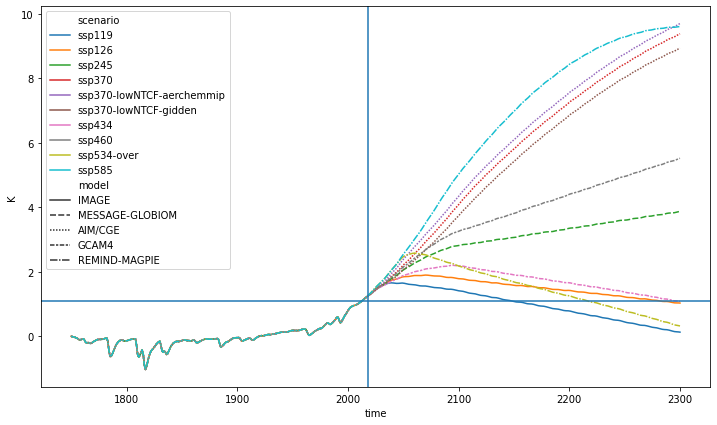

In [11]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Temperature").lineplot(
    hue="scenario", style="model", ax=ax, time_axis="year"
)
ax.axhline(1.1)
ax.axvline(2018)

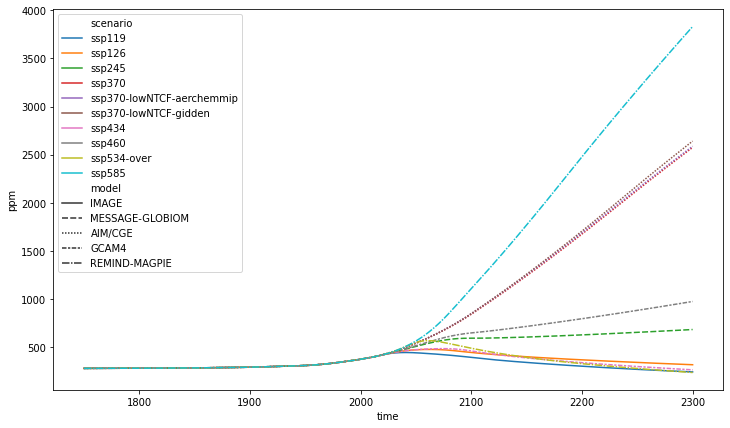

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Atmospheric Concentrations|CO2").lineplot(
    hue="scenario", style="model", ax=ax
)

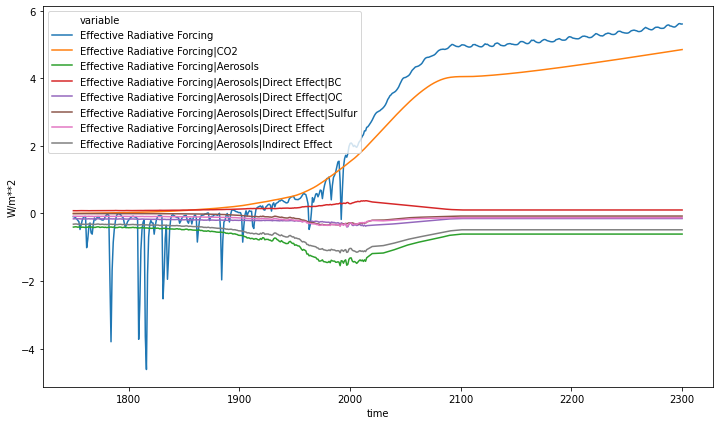

In [13]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Effective Radiative Forcing*", scenario="ssp245").lineplot(
    hue="variable", ax=ax
)